🚀 EMPLOYEE PREDICTION MODEL - 2025 FORECASTING PIPELINE
📋 CONFIGURATION:
   Section-specific Prophet Parameters:
   SEC-001: CPS=0.029254338019126417, SPS=0.01030759392216948, HPS=4.864715869874991, Monthly=10, Quarterly=5
   SEC-002: CPS=0.22762138954332634, SPS=0.014000919327379695, HPS=0.18467713067993052, Monthly=4, Quarterly=3
   SEC-003: CPS=0.10098846366877628, SPS=1.543871763639119, HPS=1.21711608065993, Monthly=6, Quarterly=3
   SEC-004: CPS=0.005151892778933222, SPS=0.9459006529861674, HPS=0.10358719372494084, Monthly=4, Quarterly=3
   SEC-005: CPS=0.004362487854811211, SPS=0.013350235089538814, HPS=15.35123292088448, Monthly=4, Quarterly=9
   SEC-006: CPS=0.0015881037419492121, SPS=0.03300723715996255, HPS=14.07408779964586, Monthly=5, Quarterly=4
   Default fallback parameters available for new sections

📂 BLOCK 1: DATA LOADING & PREPROCESSING
📥 INPUT: final_df_binary.csv (2021-2024 + 2025 data)
📊 DATA OVERVIEW:
   Total records: 10,956
   Date range: 2021-01-01 00:00:00 to

12:10:00 - cmdstanpy - INFO - Chain [1] start processing
12:10:00 - cmdstanpy - INFO - Chain [1] done processing
12:10:01 - cmdstanpy - INFO - Chain [1] start processing


      → Forecasted 239 working days in 2025
         Avg: 856.3 min, Range: 623.0-1105.2
         Training MAE (2021-2024): 413.9
   Forecasting SEC-002 for 2025...


12:10:01 - cmdstanpy - INFO - Chain [1] done processing
12:10:01 - cmdstanpy - INFO - Chain [1] start processing


      → Forecasted 239 working days in 2025
         Avg: 1395.8 min, Range: 1149.4-1664.4
         Training MAE (2021-2024): 495.6
   Forecasting SEC-003 for 2025...


12:10:01 - cmdstanpy - INFO - Chain [1] done processing
12:10:02 - cmdstanpy - INFO - Chain [1] start processing


      → Forecasted 239 working days in 2025
         Avg: 857.4 min, Range: 616.8-1150.0
         Training MAE (2021-2024): 378.9
   Forecasting SEC-004 for 2025...


12:10:02 - cmdstanpy - INFO - Chain [1] done processing
12:10:02 - cmdstanpy - INFO - Chain [1] start processing


      → Forecasted 239 working days in 2025
         Avg: 915.9 min, Range: 715.7-1101.5
         Training MAE (2021-2024): 428.3
   Forecasting SEC-005 for 2025...


12:10:02 - cmdstanpy - INFO - Chain [1] done processing
12:10:03 - cmdstanpy - INFO - Chain [1] start processing


      → Forecasted 239 working days in 2025
         Avg: 2578.2 min, Range: 1700.2-3375.6
         Training MAE (2021-2024): 1104.0
   Forecasting SEC-006 for 2025...


12:10:03 - cmdstanpy - INFO - Chain [1] done processing


      → Forecasted 239 working days in 2025
         Avg: 2001.2 min, Range: 1725.6-2384.3
         Training MAE (2021-2024): 813.8

📤 OUTPUT:
   - task_forecasts_2025: Dictionary with 6 section forecasts for 2025
   - task_time_models_2025: Dictionary with 6 trained Prophet models
   - prophet_results_2025_df: Prophet forecasting performance by section

🔍 PROPHET 2025 FORECAST SUMMARY:
  section_id  training_samples_2021_2024  forecast_days_2025  \
0    SEC-001                         968                 239   
1    SEC-002                         968                 239   
2    SEC-003                         968                 239   
3    SEC-004                         968                 239   
4    SEC-005                         968                 239   
5    SEC-006                         968                 239   

   train_mae_2021_2024  avg_predicted_task_time_2025  min_predicted_2025  \
0               413.92                        856.34              622.98   
1        

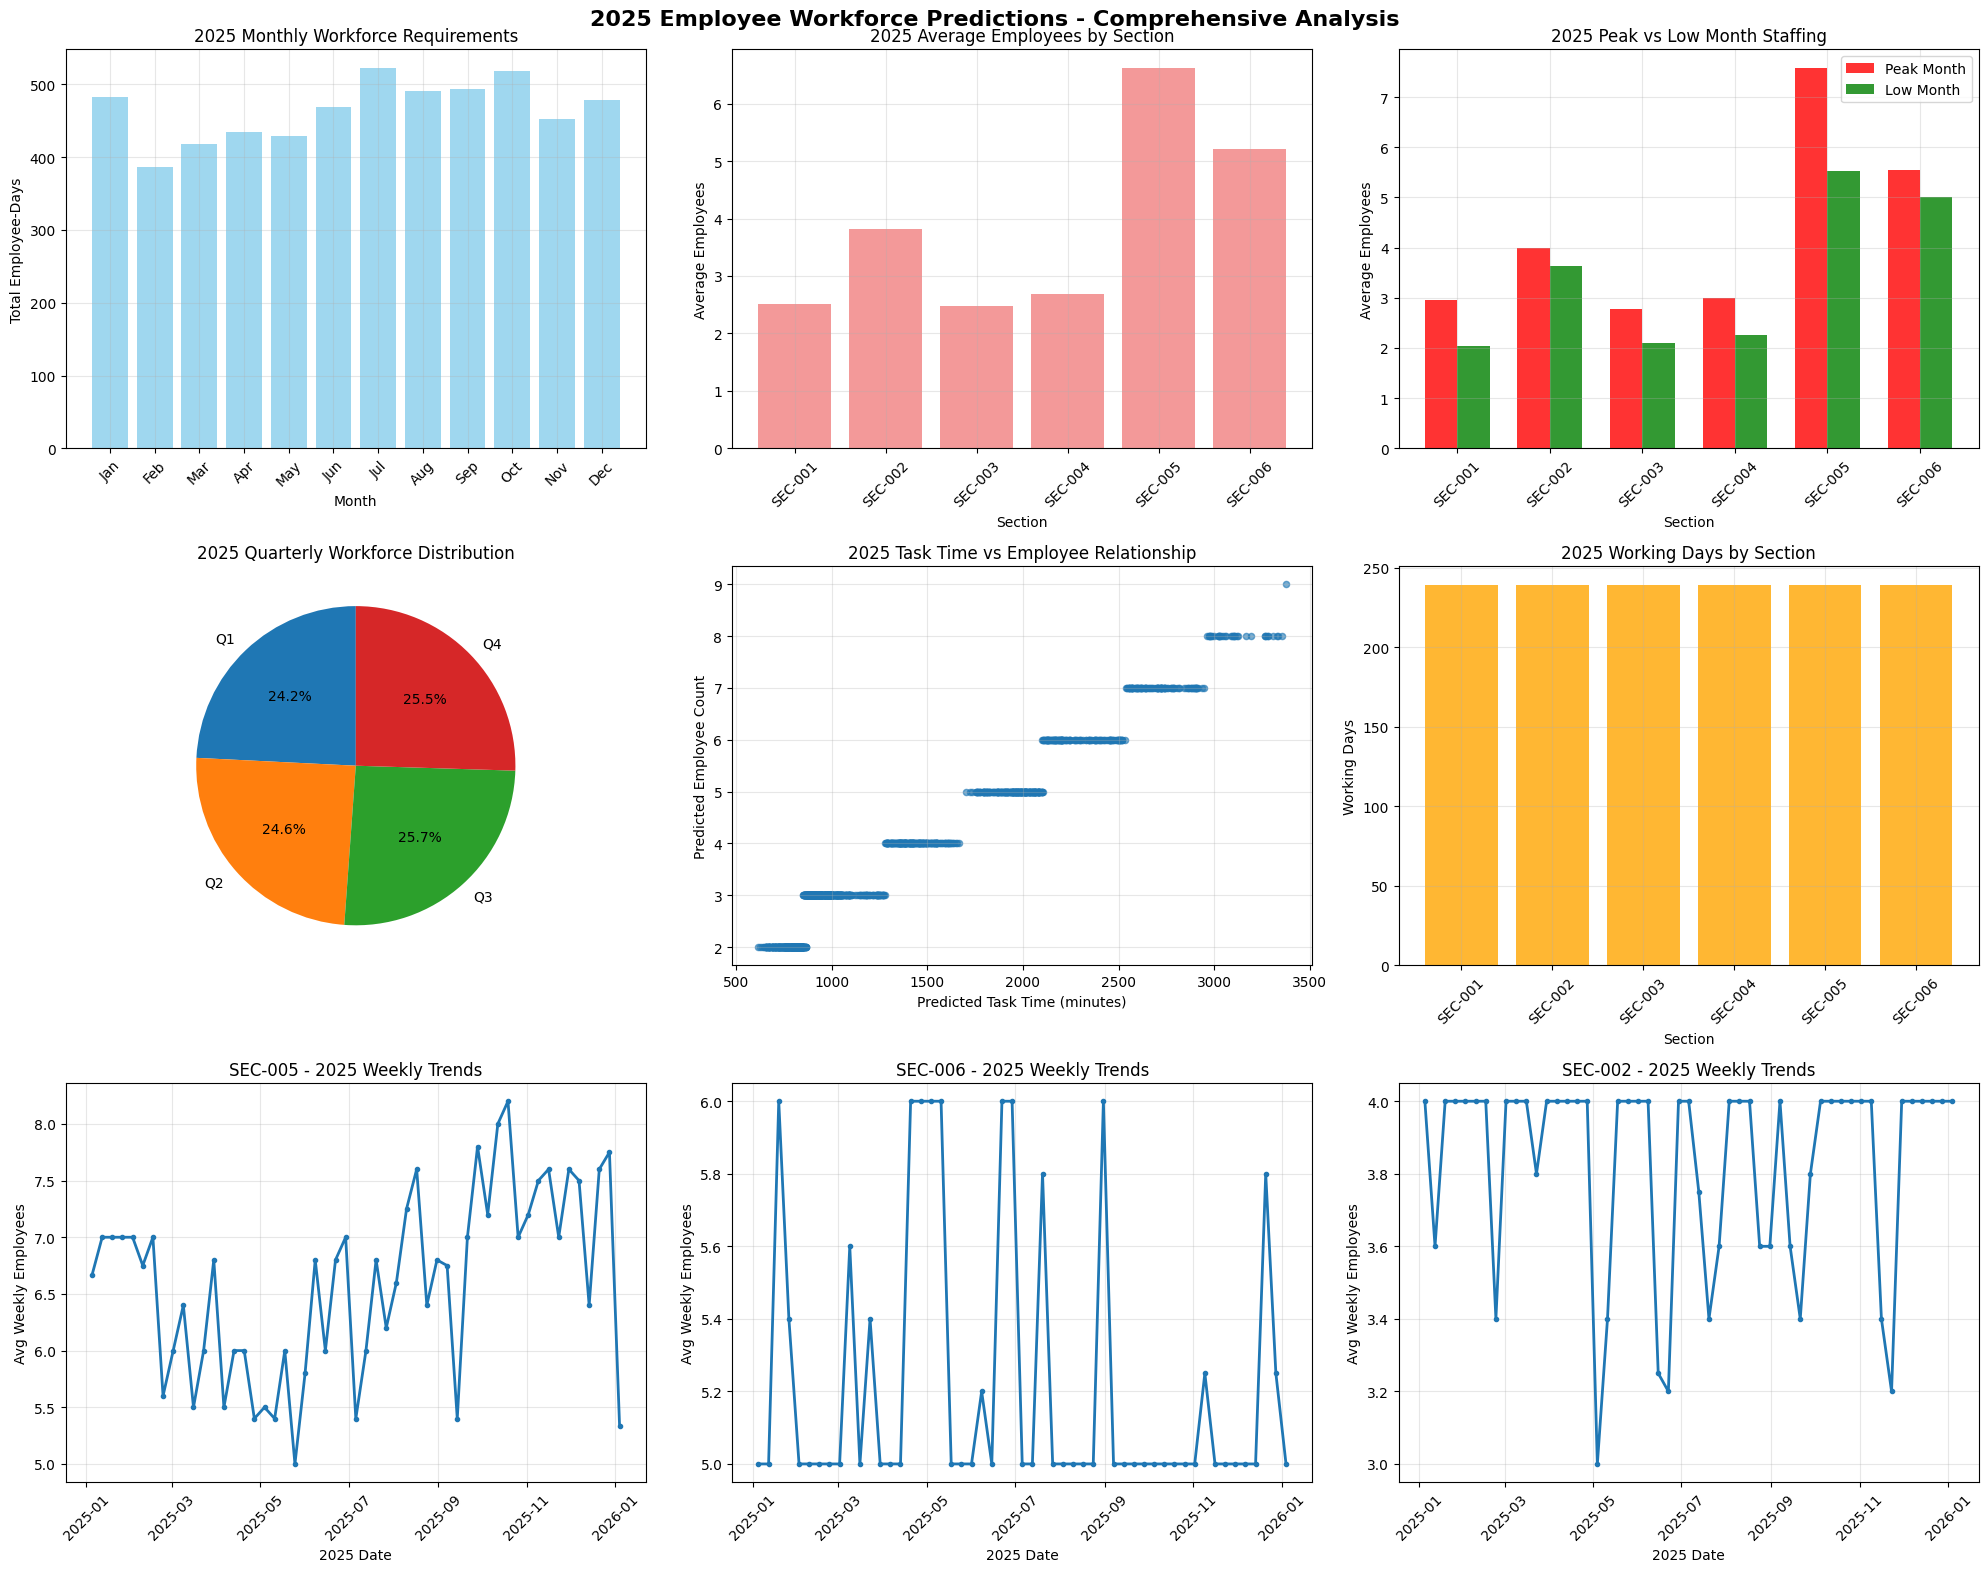

📊 CREATING 2025 CONFIDENCE INTERVALS VISUALIZATION...


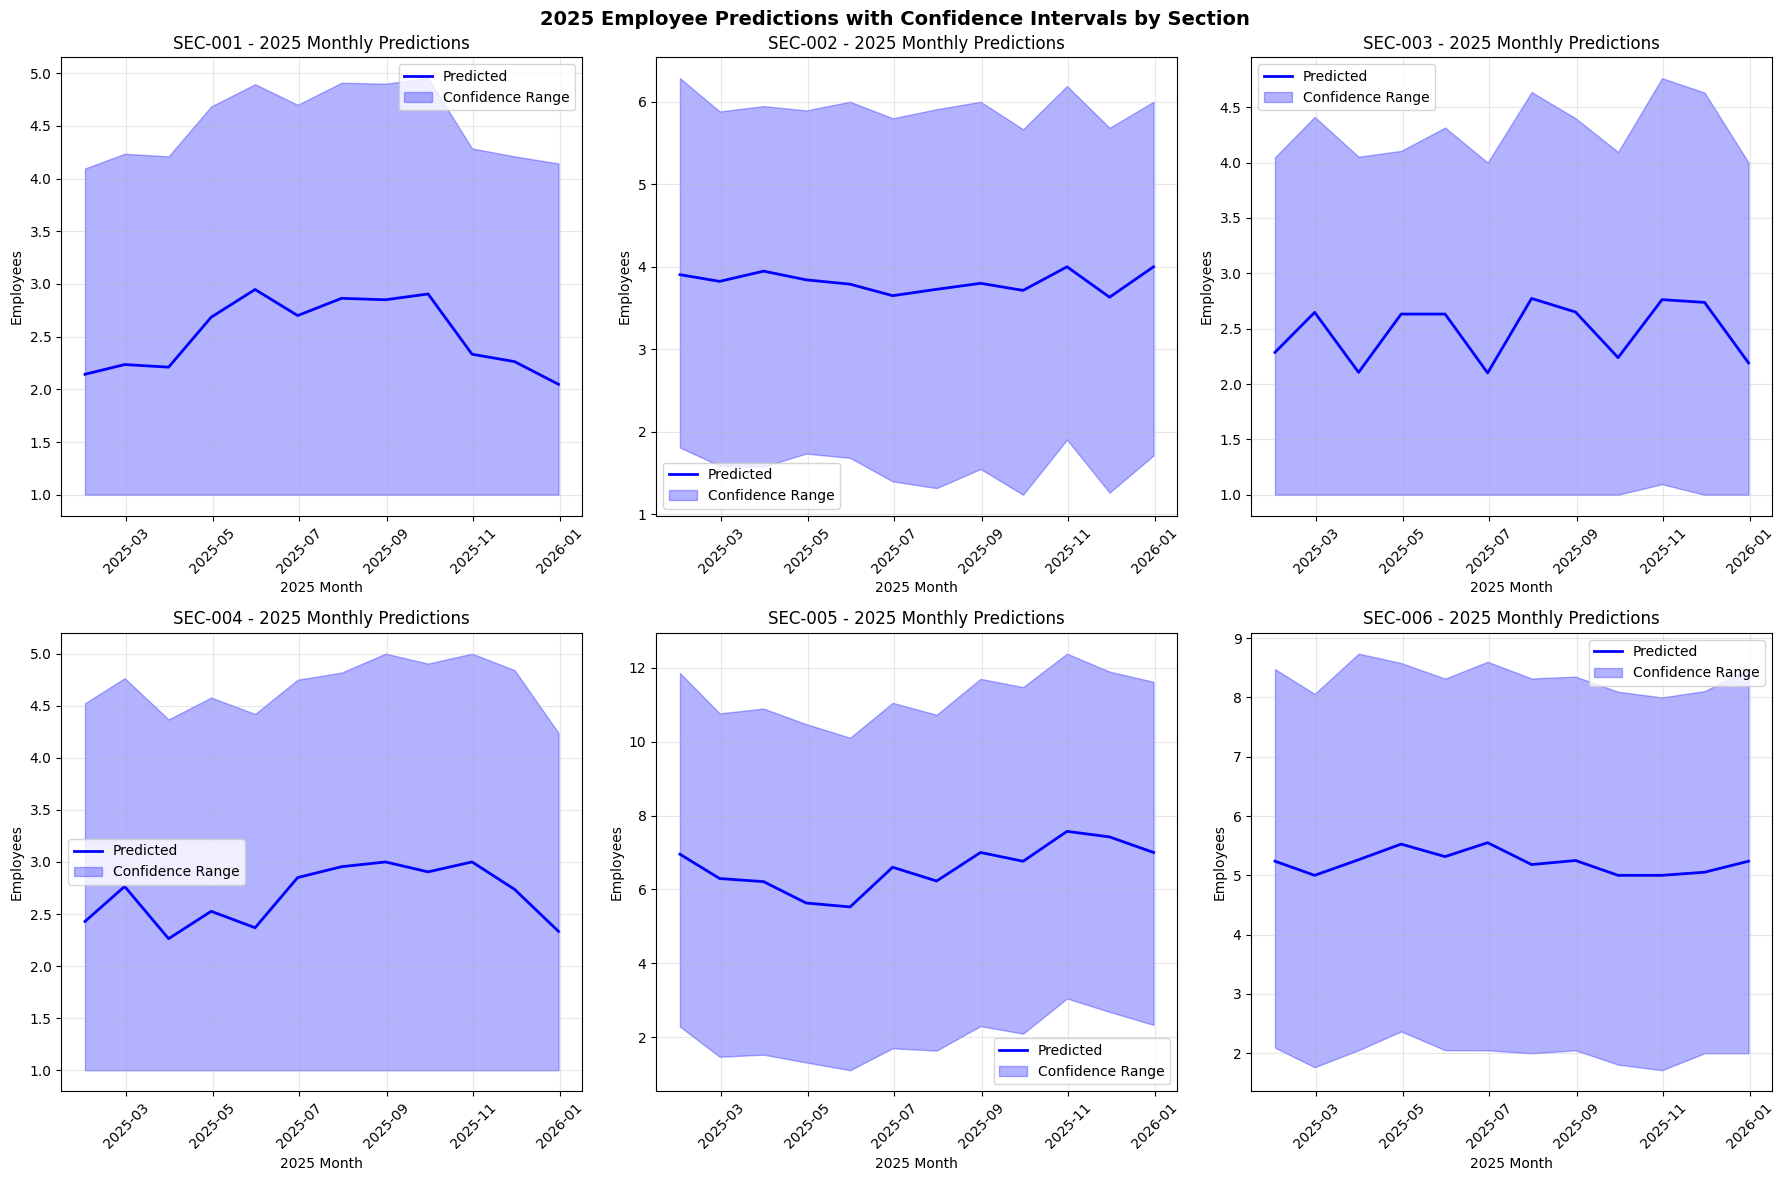


📤 OUTPUT:
   - 2025_workforce_predictions_comprehensive.png: Main 2025 analysis visualizations
   - 2025_confidence_intervals_by_section.png: Confidence intervals by section

💾 BLOCK 9: SAVE 2025 RESULTS
📥 INPUT: All 2025 analysis and prediction DataFrames
✅ 2025 FORECASTING COMPLETE!

📁 FILES SAVED:
   - complete_final_full_2025_dataset.csv: ⭐ MAIN OUTPUT - Complete 2025 predictions with confidence intervals
   - 2025_workforce_analysis_by_section.csv: Section-wise 2025 workforce analysis
   - 2025_working_days_predictions.csv: Working days only 2025 predictions
   - 2025_monthly_workforce_planning.csv: Monthly workforce planning summary
   - 2021_2024_training_correlations.csv: Updated training correlations
   - 2021_2024_training_statistics.csv: Updated training statistics
   - 2021_2024_regression_model_results.csv: Updated regression model performance
   - 2025_prophet_forecast_results.csv: 2025 Prophet forecasting results
   - 2025_task_to_employee_conversion.csv: 2025 conversio

In [1]:
# ===============================
# 📊 EMPLOYEE PREDICTION MODEL - 2025 FORECASTING
# Complete Pipeline: Task Time Forecasting → Employee Count Prediction
# Training: 2021-2024 | Prediction Target: 2025
# ===============================

import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import HuberRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("🚀 EMPLOYEE PREDICTION MODEL - 2025 FORECASTING PIPELINE")
print("=" * 60)

# ===============================
# 🔧 CONFIGURATION PARAMETERS
# ===============================
# Section-specific Prophet hyperparameters (tuned with Optuna)
PROPHET_PARAMS = {
    'SEC-001': {
        'changepoint_prior_scale': 0.029254338019126417,
        'seasonality_prior_scale': 0.01030759392216948,
        'holidays_prior_scale': 4.864715869874991,
        'fourier_order_monthly': 10,
        'fourier_order_quarterly': 5
    },
    'SEC-002': {
        'changepoint_prior_scale': 0.22762138954332634,
        'seasonality_prior_scale': 0.014000919327379695,
        'holidays_prior_scale': 0.18467713067993052,
        'fourier_order_monthly': 4,
        'fourier_order_quarterly': 3
    },
    'SEC-003': {
        'changepoint_prior_scale': 0.10098846366877628,
        'seasonality_prior_scale': 1.543871763639119,
        'holidays_prior_scale': 1.21711608065993,
        'fourier_order_monthly': 6,
        'fourier_order_quarterly': 3
    },
    'SEC-004': {
        'changepoint_prior_scale': 0.005151892778933222,
        'seasonality_prior_scale': 0.9459006529861674,
        'holidays_prior_scale': 0.10358719372494084,
        'fourier_order_monthly': 4,
        'fourier_order_quarterly': 3
    },
    'SEC-005': {
        'changepoint_prior_scale': 0.004362487854811211,
        'seasonality_prior_scale': 0.013350235089538814,
        'holidays_prior_scale': 15.35123292088448,
        'fourier_order_monthly': 4,
        'fourier_order_quarterly': 9
    },
    'SEC-006': {
        'changepoint_prior_scale': 0.0015881037419492121,
        'seasonality_prior_scale': 0.03300723715996255,
        'holidays_prior_scale': 14.07408779964586,
        'fourier_order_monthly': 5,
        'fourier_order_quarterly': 4
    }
}

# Default parameters (fallback for any missing sections)
DEFAULT_PROPHET_PARAMS = {
    'changepoint_prior_scale': 0.05,
    'seasonality_prior_scale': 8.0,
    'holidays_prior_scale': 10.0,
    'fourier_order_monthly': 5,
    'fourier_order_quarterly': 3
}

# Optimized HuberRegressor Parameters (from hyperparameter tuning)
OPTIMIZED_HUBER_PARAMS = {
    'SEC-001': {'epsilon': 2.5, 'alpha': 2.3819256646753313e-06, 'max_iter': 450, 'fit_intercept': True},
    'SEC-002': {'epsilon': 1.3, 'alpha': 0.043570676782234655, 'max_iter': 600, 'fit_intercept': True},
    'SEC-003': {'epsilon': 1.3, 'alpha': 5.002881133425486e-06, 'max_iter': 1550, 'fit_intercept': True},
    'SEC-004': {'epsilon': 1.0, 'alpha': 0.002086668812396698, 'max_iter': 300, 'fit_intercept': True},
    'SEC-005': {'epsilon': 1.4, 'alpha': 0.0001800366193826709, 'max_iter': 1350, 'fit_intercept': True},
    'SEC-006': {'epsilon': 2.5, 'alpha': 2.3819256646753313e-06, 'max_iter': 450, 'fit_intercept': True}
}

# Default HuberRegressor parameters (fallback for new sections)
DEFAULT_HUBER_PARAMS = {
    'epsilon': 1.35,
    'alpha': 0.0001,
    'max_iter': 1000,
    'fit_intercept': True
}

# Model parameters
REGRESSION_WEIGHT_THRESHOLD = 0.9  # R² threshold for regression weight
REGRESSION_WEIGHT_HIGH = 0.8       # Weight when R² > threshold
REGRESSION_WEIGHT_LOW = 0.6        # Weight when R² <= threshold

def get_huber_params(section_id):
    """Get optimized HuberRegressor parameters for a section"""
    return OPTIMIZED_HUBER_PARAMS.get(section_id, DEFAULT_HUBER_PARAMS)

print("📋 CONFIGURATION:")
print("   Section-specific Prophet Parameters:")
for section, params in PROPHET_PARAMS.items():
    print(f"   {section}: CPS={params['changepoint_prior_scale']}, SPS={params['seasonality_prior_scale']}, "
          f"HPS={params['holidays_prior_scale']}, Monthly={params['fourier_order_monthly']}, Quarterly={params['fourier_order_quarterly']}")
print(f"   Default fallback parameters available for new sections")

# ===============================
# 📂 BLOCK 1: DATA LOADING & PREPROCESSING
# ===============================
print("\n" + "=" * 60)
print("📂 BLOCK 1: DATA LOADING & PREPROCESSING")
print("=" * 60)

# Input: Raw CSV file with 2021-2024 training + 2025 prediction data
print("📥 INPUT: final_df_binary.csv (2021-2024 + 2025 data)")

# Load and preprocess data
df = pd.read_csv('final_df_binary.csv')
df['date'] = pd.to_datetime(df['date'])

# Feature engineering
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['is_working_day'] = ((df['is_holiday'] == 0) & (df['is_weekend'] == 0)).astype(int)

# Train-Test Split: Now using 2021-2024 for training, 2025 for prediction
train_data = df[df['year'] <= 2024].copy()
prediction_data = df[df['year'] == 2025].copy()

print("📊 DATA OVERVIEW:")
print(f"   Total records: {len(df):,}")
print(f"   Date range: {df['date'].min()} to {df['date'].max()}")
print(f"   Sections: {df['section_id'].nunique()}")
print(f"   Training data: {len(train_data):,} records (2021-2024)")
print(f"   Prediction target: {len(prediction_data):,} records (2025)")

# Output: Preprocessed DataFrames
print("\n📤 OUTPUT DataFrames:")
print("   - train_data: Training dataset (2021-2024)")
print("   - prediction_data: 2025 prediction target dataset")
print("   - df: Complete preprocessed dataset")

print(f"\n🔍 SAMPLE TRAINING DATA:")
print(train_data[train_data['is_working_day'] == 1].head())

print(f"\n🔍 SAMPLE 2025 TARGET DATA:")
print(prediction_data[prediction_data['is_working_day'] == 1].head())

# ===============================
# 📈 BLOCK 2: TRAINING DATA ANALYSIS (2021-2024)
# ===============================
print("\n" + "=" * 60)
print("📈 BLOCK 2: TRAINING DATA ANALYSIS (2021-2024)")
print("=" * 60)

# Input: train_data DataFrame
print("📥 INPUT: train_data (2021-2024 data)")

working_train = train_data[train_data['is_working_day'] == 1]

print("📊 CORRELATION ANALYSIS (Employee vs Task Time):")
correlations = {}
correlation_results = []

for section in working_train['section_id'].unique():
    section_data = working_train[working_train['section_id'] == section]
    if len(section_data) > 20:
        corr = section_data['employees_on_duty'].corr(section_data['total_task_time_minutes'])
        correlations[section] = corr
        correlation_results.append({
            'section_id': section,
            'correlation': corr,
            'data_points': len(section_data)
        })
        print(f"   {section}: {corr:.3f} ({len(section_data)} data points)")

# Create correlation DataFrame
correlation_df = pd.DataFrame(correlation_results)

print(f"\n📈 TRAINING STATISTICS BY SECTION (2021-2024):")
stats = working_train.groupby('section_id').agg({
    'employees_on_duty': ['count', 'mean', 'std', 'min', 'max'],
    'total_task_time_minutes': ['mean', 'std']
}).round(2)

training_stats = []
for section in stats.index:
    emp_stats = stats.loc[section, 'employees_on_duty']
    task_stats = stats.loc[section, 'total_task_time_minutes']
    
    training_stats.append({
        'section_id': section,
        'working_days': emp_stats['count'],
        'emp_mean': emp_stats['mean'],
        'emp_std': emp_stats['std'],
        'emp_min': emp_stats['min'],
        'emp_max': emp_stats['max'],
        'task_mean': task_stats['mean'],
        'task_std': task_stats['std']
    })
    
    print(f"   {section}:")
    print(f"      Working days: {emp_stats['count']:.0f}")
    print(f"      Employees: {emp_stats['mean']:.1f} ± {emp_stats['std']:.1f} (range: {emp_stats['min']:.0f}-{emp_stats['max']:.0f})")
    print(f"      Task time: {task_stats['mean']:.0f} ± {task_stats['std']:.0f} minutes")

# Create training statistics DataFrame
training_stats_df = pd.DataFrame(training_stats)

# Output: Analysis DataFrames
print("\n📤 OUTPUT DataFrames:")
print("   - correlation_df: Correlation between employees and task time by section")
print("   - training_stats_df: Comprehensive training statistics by section (2021-2024)")
print("   - working_train: Filtered training data (working days only)")

# ===============================
# 🤖 BLOCK 3: EMPLOYEE REGRESSION MODELS (Updated with 2021-2024)
# ===============================
print("\n" + "=" * 60)
print("🤖 BLOCK 3: EMPLOYEE REGRESSION MODELS (2021-2024 Training)")
print("=" * 60)

# Input: working_train DataFrame
print("📥 INPUT: working_train (working days training data 2021-2024)")

employee_models = {}
regression_results = []

print("🔨 BUILDING REGRESSION MODELS (Task Time → Employee Count):")

for section in working_train['section_id'].unique():
    section_data = working_train[working_train['section_id'] == section]

    if len(section_data) > 30:
        # Prepare regression data
        X = section_data[['total_task_time_minutes']].values
        y = section_data['employees_on_duty'].values

        # Get optimized parameters for this section
        huber_params = get_huber_params(section)

        # Build optimized model
        model = HuberRegressor(**huber_params)
        model.fit(X, y)

        # Calculate efficiency metrics
        valid_data = section_data[section_data['employees_on_duty'] > 0].copy()
        valid_data['task_per_emp'] = valid_data['total_task_time_minutes'] / valid_data['employees_on_duty']

        # Store model information
        r2_score_val = model.score(X, y)
        
        employee_models[section] = {
            'regression_model': model,
            'avg_task_per_employee': valid_data['task_per_emp'].median(),
            'min_employees': section_data['employees_on_duty'].min(),
            'max_employees': section_data['employees_on_duty'].max(),
            'training_r2': r2_score_val
        }

        regression_results.append({
            'section_id': section,
            'r2_score': r2_score_val,
            'avg_efficiency': valid_data['task_per_emp'].median(),
            'min_employees': section_data['employees_on_duty'].min(),
            'max_employees': section_data['employees_on_duty'].max(),
            'training_samples': len(section_data)
        })

        print(f"   {section}: R² = {r2_score_val:.3f}, Avg efficiency = {valid_data['task_per_emp'].median():.1f} min/emp")

# Create regression results DataFrame
regression_results_df = pd.DataFrame(regression_results)

# Output: Models and results
print(f"\n📤 OUTPUT:")
print(f"   - employee_models: Dictionary with {len(employee_models)} trained regression models")
print("   - regression_results_df: Regression performance metrics by section")

print(f"\n🔍 REGRESSION SUMMARY:")
print(regression_results_df.round(2))

# ===============================
# 🔮 BLOCK 4: PROPHET TASK TIME FORECASTING FOR 2025
# ===============================
print("\n" + "=" * 60)
print("🔮 BLOCK 4: PROPHET TASK TIME FORECASTING FOR 2025")
print("=" * 60)

# Input: working_train DataFrame
print("📥 INPUT: working_train (2021-2024 working days training data)")

task_forecasts_2025 = {}
task_time_models_2025 = {}
prophet_results_2025 = []

print("📊 FORECASTING 2025 TASK TIME WITH PROPHET (including regressors)...")

for section in working_train['section_id'].unique():
    print(f"   Forecasting {section} for 2025...")
    section_data = working_train[working_train['section_id'] == section].copy()

    if len(section_data) < 50:
        print(f"      ⚠️  Insufficient training data ({len(section_data)} records)")
        continue

    # Prepare Prophet DataFrame
    prophet_df = section_data[['date', 'total_task_time_minutes', 'is_weekend', 'is_holiday']].copy()
    prophet_df.columns = ['ds', 'y', 'is_weekend', 'is_holiday']
    prophet_df = prophet_df.sort_values('ds')

    # Section-specific parameters or fallback
    section_params = PROPHET_PARAMS.get(section, DEFAULT_PROPHET_PARAMS)
    
    # Build Prophet model
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=section_params['changepoint_prior_scale'],
        seasonality_prior_scale=section_params['seasonality_prior_scale'],
        holidays_prior_scale=section_params['holidays_prior_scale']
    )

    # Add custom seasonalities
    model.add_seasonality(name='monthly', period=30.5, fourier_order=section_params['fourier_order_monthly'])
    model.add_seasonality(name='quarterly', period=91.25, fourier_order=section_params['fourier_order_quarterly'])
    
    # Add regressors
    model.add_regressor('is_weekend', prior_scale=0.5)
    model.add_regressor('is_holiday', prior_scale=1.0)

    # Fit model with regressors
    model.fit(prophet_df[['ds', 'y', 'is_weekend', 'is_holiday']])

    # Prepare 2025 forecast dates with regressors
    prediction_working_2025 = prediction_data[(prediction_data['section_id'] == section) & (prediction_data['is_working_day'] == 1)].copy()
    if len(prediction_working_2025) > 0:
        future_df_2025 = prediction_working_2025[['date', 'is_weekend', 'is_holiday']].copy()
        future_df_2025.columns = ['ds', 'is_weekend', 'is_holiday']
        forecast_2025 = model.predict(future_df_2025)
        forecast_2025['yhat'] = forecast_2025['yhat'].clip(lower=0)

        task_forecasts_2025[section] = {
            'dates': future_df_2025['ds'].values,
            'predictions': forecast_2025['yhat'].values,
            'lower_bound': forecast_2025['yhat_lower'].values,
            'upper_bound': forecast_2025['yhat_upper'].values
        }
        task_time_models_2025[section] = model

        # Training MAE on 2021-2024 data
        train_forecast = model.predict(prophet_df[['ds', 'is_weekend', 'is_holiday']])
        train_mae = mean_absolute_error(prophet_df['y'], train_forecast['yhat'])

        prophet_results_2025.append({
            'section_id': section,
            'training_samples_2021_2024': len(prophet_df),
            'forecast_days_2025': len(future_df_2025),
            'train_mae_2021_2024': train_mae,
            'avg_predicted_task_time_2025': forecast_2025['yhat'].mean(),
            'min_predicted_2025': forecast_2025['yhat'].min(),
            'max_predicted_2025': forecast_2025['yhat'].max(),
            'changepoint_prior_scale': section_params['changepoint_prior_scale'],
            'seasonality_prior_scale': section_params['seasonality_prior_scale'],
            'holidays_prior_scale': section_params['holidays_prior_scale'],
            'fourier_monthly': section_params['fourier_order_monthly'],
            'fourier_quarterly': section_params['fourier_order_quarterly']
        })
        
        print(f"      → Forecasted {len(future_df_2025)} working days in 2025")
        print(f"         Avg: {forecast_2025['yhat'].mean():.1f} min, Range: {forecast_2025['yhat'].min():.1f}-{forecast_2025['yhat'].max():.1f}")
        print(f"         Training MAE (2021-2024): {train_mae:.1f}")

# Create Prophet results DataFrame
prophet_results_2025_df = pd.DataFrame(prophet_results_2025)

# Output: 2025 Forecasts and models
print(f"\n📤 OUTPUT:")
print(f"   - task_forecasts_2025: Dictionary with {len(task_forecasts_2025)} section forecasts for 2025")
print(f"   - task_time_models_2025: Dictionary with {len(task_time_models_2025)} trained Prophet models")
print("   - prophet_results_2025_df: Prophet forecasting performance by section")

print(f"\n🔍 PROPHET 2025 FORECAST SUMMARY:")
print(prophet_results_2025_df.round(2))

# ===============================
# 🔄 BLOCK 5: 2025 TASK TIME → EMPLOYEE CONVERSION
# ===============================
print("\n" + "=" * 60)
print("🔄 BLOCK 5: 2025 TASK TIME → EMPLOYEE CONVERSION")
print("=" * 60)

# Input: task_forecasts_2025, employee_models
print("📥 INPUT: task_forecasts_2025 (Prophet 2025 predictions), employee_models (Regression models)")

employee_predictions_2025 = {}
conversion_results_2025 = []

print("🔄 CONVERTING 2025 TASK TIME FORECASTS TO EMPLOYEE PREDICTIONS:")

for section, forecast_data in task_forecasts_2025.items():
    if section not in employee_models:
        print(f"   ⚠️  {section}: No regression model available")
        continue

    model_info = employee_models[section]
    dates = forecast_data['dates']
    predicted_task_time = forecast_data['predictions']
    lower_bound = forecast_data['lower_bound']
    upper_bound = forecast_data['upper_bound']

    # Method 1: Regression prediction
    predicted_employees_reg = model_info['regression_model'].predict(predicted_task_time.reshape(-1, 1))
    
    # Method 2: Efficiency-based prediction
    predicted_employees_eff = predicted_task_time / model_info['avg_task_per_employee']

    # Combine predictions based on regression R²
    r2_val = model_info['training_r2']
    weight_reg = REGRESSION_WEIGHT_HIGH if r2_val > REGRESSION_WEIGHT_THRESHOLD else REGRESSION_WEIGHT_LOW

    final_predictions = weight_reg * predicted_employees_reg + (1 - weight_reg) * predicted_employees_eff
    final_predictions = np.round(final_predictions).astype(int)
    
    # Calculate confidence bounds for employees
    employees_lower = np.round(lower_bound / model_info['avg_task_per_employee']).astype(int)
    employees_upper = np.round(upper_bound / model_info['avg_task_per_employee']).astype(int)
    
    # Apply constraints
    final_predictions = np.clip(
        final_predictions,
        max(1, model_info['min_employees']),
        int(model_info['max_employees'] * 1.3)  # Allow 30% above historical max for 2025
    )
    
    employees_lower = np.clip(employees_lower, max(1, model_info['min_employees']), final_predictions)
    employees_upper = np.clip(employees_upper, final_predictions, int(model_info['max_employees'] * 1.5))

    employee_predictions_2025[section] = {
        'dates': dates,
        'predictions': final_predictions,
        'lower_bound': employees_lower,
        'upper_bound': employees_upper
    }
    
    conversion_results_2025.append({
        'section_id': section,
        'forecast_days_2025': len(dates),
        'avg_predicted_employees_2025': final_predictions.mean(),
        'min_predicted_2025': final_predictions.min(),
        'max_predicted_2025': final_predictions.max(),
        'regression_weight': weight_reg,
        'model_r2': r2_val,
        'avg_confidence_range': (employees_upper - employees_lower).mean()
    })

    print(f"   {section}: {len(dates)} working days in 2025")
    print(f"      Avg employees: {final_predictions.mean():.1f} (range: {final_predictions.min()}-{final_predictions.max()})")
    print(f"      Model weight: {weight_reg:.1f}, R²: {r2_val:.3f}")

# Create conversion results DataFrame
conversion_results_2025_df = pd.DataFrame(conversion_results_2025)

# Output: 2025 Employee predictions
print(f"\n📤 OUTPUT:")
print(f"   - employee_predictions_2025: Dictionary with {len(employee_predictions_2025)} section predictions")
print("   - conversion_results_2025_df: 2025 conversion statistics by section")

print(f"\n🔍 2025 CONVERSION SUMMARY:")
print(conversion_results_2025_df.round(3))

# ===============================
# 📊 BLOCK 6: 2025 COMPLETE PREDICTIONS ASSEMBLY
# ===============================
print("\n" + "=" * 60)
print("📊 BLOCK 6: 2025 COMPLETE PREDICTIONS ASSEMBLY")
print("=" * 60)

# Input: prediction_data, employee_predictions_2025, task_forecasts_2025
print("📥 INPUT: prediction_data (2025 data), employee_predictions_2025, task_forecasts_2025")

# Create complete 2025 predictions DataFrame
complete_final_full_2025_dataset = prediction_data.copy()
complete_final_full_2025_dataset['predicted_employee_count'] = 0
complete_final_full_2025_dataset['predicted_task_time_minutes'] = 0.0
complete_final_full_2025_dataset['employee_lower_bound'] = 0
complete_final_full_2025_dataset['employee_upper_bound'] = 0
complete_final_full_2025_dataset['task_time_lower_bound'] = 0.0
complete_final_full_2025_dataset['task_time_upper_bound'] = 0.0

# Map employee predictions to DataFrame
for section, pred_data in employee_predictions_2025.items():
    for i, date in enumerate(pred_data['dates']):
        mask = (complete_final_full_2025_dataset['section_id'] == section) & (complete_final_full_2025_dataset['date'] == date)
        complete_final_full_2025_dataset.loc[mask, 'predicted_employee_count'] = pred_data['predictions'][i]
        complete_final_full_2025_dataset.loc[mask, 'employee_lower_bound'] = pred_data['lower_bound'][i]
        complete_final_full_2025_dataset.loc[mask, 'employee_upper_bound'] = pred_data['upper_bound'][i]

# Map task time predictions to DataFrame
for section, forecast_data in task_forecasts_2025.items():
    for i, date in enumerate(forecast_data['dates']):
        mask = (complete_final_full_2025_dataset['section_id'] == section) & (complete_final_full_2025_dataset['date'] == date)
        complete_final_full_2025_dataset.loc[mask, 'predicted_task_time_minutes'] = forecast_data['predictions'][i]
        complete_final_full_2025_dataset.loc[mask, 'task_time_lower_bound'] = forecast_data['lower_bound'][i]
        complete_final_full_2025_dataset.loc[mask, 'task_time_upper_bound'] = forecast_data['upper_bound'][i]

print("📊 2025 PREDICTIONS ASSEMBLY COMPLETE:")
print(f"   Total 2025 records: {len(complete_final_full_2025_dataset):,}")
print(f"   Working day predictions: {len(complete_final_full_2025_dataset[complete_final_full_2025_dataset['is_working_day'] == 1]):,}")
print(f"   Sections with predictions: {complete_final_full_2025_dataset[complete_final_full_2025_dataset['predicted_employee_count'] > 0]['section_id'].nunique()}")

# Output: Complete 2025 predictions
print(f"\n📤 OUTPUT:")
print("   - complete_final_full_2025_dataset: Complete 2025 predictions with confidence intervals")

print(f"\n🔍 2025 PREDICTIONS SAMPLE:")
working_sample = complete_final_full_2025_dataset[complete_final_full_2025_dataset['is_working_day'] == 1].head(15)
print(working_sample[['date', 'section_id', 'predicted_employee_count', 'predicted_task_time_minutes', 
                      'employee_lower_bound', 'employee_upper_bound']].to_string())

# ===============================
# 📈 BLOCK 7: 2025 PREDICTION ANALYSIS & INSIGHTS
# ===============================
print("\n" + "=" * 60)
print("📈 BLOCK 7: 2025 PREDICTION ANALYSIS & INSIGHTS")
print("=" * 60)

# Input: complete_final_full_2025_dataset
print("📥 INPUT: complete_final_full_2025_dataset")

working_2025_predictions = complete_final_full_2025_dataset[complete_final_full_2025_dataset['is_working_day'] == 1].copy()

print(f"📊 2025 WORKFORCE PLANNING INSIGHTS:")
print(f"   Total working days in 2025: {len(working_2025_predictions):,}")

# Section-wise 2025 analysis
section_analysis_2025 = []
print(f"\n📋 SECTION-WISE 2025 PREDICTIONS:")

for section in working_2025_predictions['section_id'].unique():
    section_data = working_2025_predictions[working_2025_predictions['section_id'] == section]
    if len(section_data) > 0:
        
        # Monthly patterns
        section_data['month'] = section_data['date'].dt.month
        monthly_avg = section_data.groupby('month')['predicted_employee_count'].mean()
        
        # Quarterly patterns  
        section_data['quarter'] = section_data['date'].dt.quarter
        quarterly_avg = section_data.groupby('quarter')['predicted_employee_count'].mean()
        
        # Peak and low periods
        peak_month = monthly_avg.idxmax()
        low_month = monthly_avg.idxmin()
        
        section_analysis_2025.append({
            'Section': section,
            'Working_Days_2025': len(section_data),
            'Avg_Employees_2025': section_data['predicted_employee_count'].mean(),
            'Min_Employees_2025': section_data['predicted_employee_count'].min(),
            'Max_Employees_2025': section_data['predicted_employee_count'].max(),
            'Avg_Task_Time_2025': section_data['predicted_task_time_minutes'].mean(),
            'Peak_Month': peak_month,
            'Peak_Month_Avg': monthly_avg[peak_month],
            'Low_Month': low_month,
            'Low_Month_Avg': monthly_avg[low_month],
            'Q1_Avg': quarterly_avg.get(1, 0),
            'Q2_Avg': quarterly_avg.get(2, 0),
            'Q3_Avg': quarterly_avg.get(3, 0),
            'Q4_Avg': quarterly_avg.get(4, 0),
            'Total_Employee_Days_2025': section_data['predicted_employee_count'].sum()
        })

        print(f"   {section}:")
        print(f"      Working days: {len(section_data)}")
        print(f"      Avg employees: {section_data['predicted_employee_count'].mean():.1f} (range: {section_data['predicted_employee_count'].min()}-{section_data['predicted_employee_count'].max()})")
        print(f"      Peak: Month {peak_month} ({monthly_avg[peak_month]:.1f} avg), Low: Month {low_month} ({monthly_avg[low_month]:.1f} avg)")
        print(f"      Quarterly averages: Q1={quarterly_avg.get(1, 0):.1f}, Q2={quarterly_avg.get(2, 0):.1f}, Q3={quarterly_avg.get(3, 0):.1f}, Q4={quarterly_avg.get(4, 0):.1f}")

# Create 2025 analysis DataFrame
section_analysis_2025_df = pd.DataFrame(section_analysis_2025)

# Overall 2025 insights
total_employee_days_2025 = working_2025_predictions['predicted_employee_count'].sum()
avg_daily_workforce_2025 = working_2025_predictions['predicted_employee_count'].mean()
total_task_time_2025 = working_2025_predictions['predicted_task_time_minutes'].sum()

print(f"\n🎯 2025 OVERALL WORKFORCE INSIGHTS:")
print(f"   Total employee-days needed: {total_employee_days_2025:,}")
print(f"   Average daily workforce: {avg_daily_workforce_2025:.1f} employees")
print(f"   Total predicted task time: {total_task_time_2025:,.0f} minutes ({total_task_time_2025/60:,.0f} hours)")
print(f"   Average daily task time: {total_task_time_2025/len(working_2025_predictions):,.0f} minutes per day")

# Monthly workforce planning
print(f"\n📅 2025 MONTHLY WORKFORCE PLANNING:")
monthly_workforce = working_2025_predictions.groupby(working_2025_predictions['date'].dt.month).agg({
    'predicted_employee_count': ['sum', 'mean', 'max'],
    'predicted_task_time_minutes': 'sum'
}).round(1)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month in range(1, 13):
    if month in monthly_workforce.index:
        emp_sum = monthly_workforce.loc[month, ('predicted_employee_count', 'sum')]
        emp_avg = monthly_workforce.loc[month, ('predicted_employee_count', 'mean')]
        emp_max = monthly_workforce.loc[month, ('predicted_employee_count', 'max')]
        task_sum = monthly_workforce.loc[month, ('predicted_task_time_minutes', 'sum')]
        print(f"   {month_names[month-1]} 2025: {emp_sum:,.0f} employee-days, {emp_avg:.1f} avg daily, {emp_max:.0f} peak daily, {task_sum/60:,.0f} total hours")

# Output: Analysis results
print(f"\n📤 OUTPUT:")
print("   - section_analysis_2025_df: Detailed 2025 analysis by section")
print("   - monthly_workforce: Monthly aggregated workforce data")
print("   - working_2025_predictions: Working day predictions with analysis columns")

# ===============================
# 📈 BLOCK 8: 2025 VISUALIZATIONS
# ===============================
print("\n" + "=" * 60)
print("📈 BLOCK 8: 2025 VISUALIZATIONS")
print("=" * 60)

# Input: working_2025_predictions, section_analysis_2025_df
print("📥 INPUT: working_2025_predictions, section_analysis_2025_df")

print("📊 CREATING COMPREHENSIVE 2025 VISUALIZATIONS...")

# Create main 2025 visualization grid
fig = plt.figure(figsize=(20, 16))
plt.suptitle('2025 Employee Workforce Predictions - Comprehensive Analysis', fontsize=16, fontweight='bold')

# 1. Monthly workforce trends
plt.subplot(3, 3, 1)
monthly_totals = working_2025_predictions.groupby(working_2025_predictions['date'].dt.month)['predicted_employee_count'].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(range(1, 13), [monthly_totals.get(i, 0) for i in range(1, 13)], color='skyblue', alpha=0.8)
plt.xlabel('Month')
plt.ylabel('Total Employee-Days')
plt.title('2025 Monthly Workforce Requirements')
plt.xticks(range(1, 13), [month_names[i-1] for i in range(1, 13)], rotation=45)
plt.grid(True, alpha=0.3)

# 2. Section-wise average employees
plt.subplot(3, 3, 2)
plt.bar(section_analysis_2025_df['Section'], section_analysis_2025_df['Avg_Employees_2025'], color='lightcoral', alpha=0.8)
plt.xlabel('Section')
plt.ylabel('Average Employees')
plt.title('2025 Average Employees by Section')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 3. Peak vs Low month comparison
plt.subplot(3, 3, 3)
x = np.arange(len(section_analysis_2025_df))
width = 0.35
plt.bar(x - width/2, section_analysis_2025_df['Peak_Month_Avg'], width, label='Peak Month', alpha=0.8, color='red')
plt.bar(x + width/2, section_analysis_2025_df['Low_Month_Avg'], width, label='Low Month', alpha=0.8, color='green')
plt.xlabel('Section')
plt.ylabel('Average Employees')
plt.title('2025 Peak vs Low Month Staffing')
plt.xticks(x, section_analysis_2025_df['Section'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Quarterly workforce distribution
plt.subplot(3, 3, 4)
quarterly_data = section_analysis_2025_df[['Q1_Avg', 'Q2_Avg', 'Q3_Avg', 'Q4_Avg']].mean()
plt.pie(quarterly_data, labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%1.1f%%', startangle=90)
plt.title('2025 Quarterly Workforce Distribution')

# 5. Task time vs Employee count correlation
plt.subplot(3, 3, 5)
plt.scatter(working_2025_predictions['predicted_task_time_minutes'], 
           working_2025_predictions['predicted_employee_count'], alpha=0.6, s=20)
plt.xlabel('Predicted Task Time (minutes)')
plt.ylabel('Predicted Employee Count')
plt.title('2025 Task Time vs Employee Relationship')
plt.grid(True, alpha=0.3)

# 6. Working days distribution by section
plt.subplot(3, 3, 6)
plt.bar(section_analysis_2025_df['Section'], section_analysis_2025_df['Working_Days_2025'], color='orange', alpha=0.8)
plt.xlabel('Section')
plt.ylabel('Working Days')
plt.title('2025 Working Days by Section')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 7-9. Section-specific time series for top 3 sections by workforce
top_sections = section_analysis_2025_df.nlargest(3, 'Total_Employee_Days_2025')['Section'].tolist()
for i, section in enumerate(top_sections, 7):
    plt.subplot(3, 3, i)
    section_data = working_2025_predictions[working_2025_predictions['section_id'] == section]
    # Resample to weekly averages for cleaner visualization
    section_weekly = section_data.set_index('date').resample('W')['predicted_employee_count'].mean()
    plt.plot(section_weekly.index, section_weekly.values, linewidth=2, marker='o', markersize=3)
    plt.xlabel('2025 Date')
    plt.ylabel('Avg Weekly Employees')
    plt.title(f'{section} - 2025 Weekly Trends')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('2025_workforce_predictions_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()

# Create confidence intervals visualization
print("📊 CREATING 2025 CONFIDENCE INTERVALS VISUALIZATION...")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('2025 Employee Predictions with Confidence Intervals by Section', fontsize=14, fontweight='bold')

sections_with_predictions = working_2025_predictions[working_2025_predictions['predicted_employee_count'] > 0]['section_id'].unique()
for i, section in enumerate(sections_with_predictions[:6]):  # Top 6 sections
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    section_data = working_2025_predictions[working_2025_predictions['section_id'] == section].copy()
    section_data = section_data.sort_values('date')
    
    # Monthly aggregation for cleaner visualization
    monthly_data = section_data.set_index('date').resample('M').agg({
        'predicted_employee_count': 'mean',
        'employee_lower_bound': 'mean',
        'employee_upper_bound': 'mean'
    })
    
    ax.plot(monthly_data.index, monthly_data['predicted_employee_count'], 'b-', linewidth=2, label='Predicted')
    ax.fill_between(monthly_data.index, monthly_data['employee_lower_bound'], 
                   monthly_data['employee_upper_bound'], alpha=0.3, color='blue', label='Confidence Range')
    ax.set_title(f'{section} - 2025 Monthly Predictions')
    ax.set_xlabel('2025 Month')
    ax.set_ylabel('Employees')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('2025_confidence_intervals_by_section.png', dpi=300, bbox_inches='tight')
plt.show()

# Output: Visualization files
print(f"\n📤 OUTPUT:")
print("   - 2025_workforce_predictions_comprehensive.png: Main 2025 analysis visualizations")
print("   - 2025_confidence_intervals_by_section.png: Confidence intervals by section")

# ===============================
# 💾 BLOCK 9: SAVE 2025 RESULTS
# ===============================
print("\n" + "=" * 60)
print("💾 BLOCK 9: SAVE 2025 RESULTS")
print("=" * 60)

# Input: All generated 2025 DataFrames
print("📥 INPUT: All 2025 analysis and prediction DataFrames")

# Save all important 2025 DataFrames
complete_final_full_2025_dataset.to_csv('complete_final_full_2025_dataset.csv', index=False)
section_analysis_2025_df.to_csv('2025_workforce_analysis_by_section.csv', index=False)
working_2025_predictions.to_csv('2025_working_days_predictions.csv', index=False)
correlation_df.to_csv('2021_2024_training_correlations.csv', index=False)
training_stats_df.to_csv('2021_2024_training_statistics.csv', index=False)
regression_results_df.to_csv('2021_2024_regression_model_results.csv', index=False)
prophet_results_2025_df.to_csv('2025_prophet_forecast_results.csv', index=False)
conversion_results_2025_df.to_csv('2025_task_to_employee_conversion.csv', index=False)

# Save monthly workforce planning data
monthly_workforce_df = pd.DataFrame({
    'Month': range(1, 13),
    'Month_Name': month_names,
    'Total_Employee_Days': [monthly_workforce.loc[i, ('predicted_employee_count', 'sum')] if i in monthly_workforce.index else 0 for i in range(1, 13)],
    'Avg_Daily_Employees': [monthly_workforce.loc[i, ('predicted_employee_count', 'mean')] if i in monthly_workforce.index else 0 for i in range(1, 13)],
    'Peak_Daily_Employees': [monthly_workforce.loc[i, ('predicted_employee_count', 'max')] if i in monthly_workforce.index else 0 for i in range(1, 13)],
    'Total_Task_Hours': [monthly_workforce.loc[i, ('predicted_task_time_minutes', 'sum')]/60 if i in monthly_workforce.index else 0 for i in range(1, 13)]
})
monthly_workforce_df.to_csv('2025_monthly_workforce_planning.csv', index=False)

print("✅ 2025 FORECASTING COMPLETE!")
print(f"\n📁 FILES SAVED:")
print(f"   - complete_final_full_2025_dataset.csv: ⭐ MAIN OUTPUT - Complete 2025 predictions with confidence intervals")
print(f"   - 2025_workforce_analysis_by_section.csv: Section-wise 2025 workforce analysis")
print(f"   - 2025_working_days_predictions.csv: Working days only 2025 predictions")
print(f"   - 2025_monthly_workforce_planning.csv: Monthly workforce planning summary")
print(f"   - 2021_2024_training_correlations.csv: Updated training correlations")
print(f"   - 2021_2024_training_statistics.csv: Updated training statistics")
print(f"   - 2021_2024_regression_model_results.csv: Updated regression model performance")
print(f"   - 2025_prophet_forecast_results.csv: 2025 Prophet forecasting results")
print(f"   - 2025_task_to_employee_conversion.csv: 2025 conversion metrics")

print("\n📊 FINAL 2025 WORKFORCE SUMMARY:")
print(section_analysis_2025_df.round(2))

print(f"\n🎯 2025 KEY METRICS:")
print(f"   📅 Total working days: {len(working_2025_predictions):,}")
print(f"   👥 Total employee-days needed: {total_employee_days_2025:,}")
print(f"   📈 Average daily workforce: {avg_daily_workforce_2025:.1f} employees")
print(f"   ⏱️  Total predicted task time: {total_task_time_2025/60:,.0f} hours")
print(f"   🏢 Sections covered: {len(section_analysis_2025_df)}")

# Workforce planning recommendations
print(f"\n💡 2025 WORKFORCE PLANNING RECOMMENDATIONS:")
peak_month = monthly_workforce[('predicted_employee_count', 'sum')].idxmax()
low_month = monthly_workforce[('predicted_employee_count', 'sum')].idxmin()
print(f"   📈 Peak staffing month: {month_names[peak_month-1]} ({monthly_workforce.loc[peak_month, ('predicted_employee_count', 'sum')]:,.0f} employee-days)")
print(f"   📉 Lowest staffing month: {month_names[low_month-1]} ({monthly_workforce.loc[low_month, ('predicted_employee_count', 'sum')]:,.0f} employee-days)")

# Identify sections needing most attention
high_variance_sections = section_analysis_2025_df[section_analysis_2025_df['Max_Employees_2025'] - section_analysis_2025_df['Min_Employees_2025'] > 3]
if len(high_variance_sections) > 0:
    print(f"   ⚠️  Sections with high staffing variability:")
    for _, section in high_variance_sections.iterrows():
        print(f"      {section['Section']}: {section['Min_Employees_2025']}-{section['Max_Employees_2025']} employees (range: {section['Max_Employees_2025']-section['Min_Employees_2025']})")

print(f"\n🎉 2025 EMPLOYEE FORECASTING PIPELINE COMPLETED SUCCESSFULLY!")
print(f"📋 Main output file: 'complete_final_full_2025_dataset.csv'")
print("=" * 60)